In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Wine dataset
wine = pd.read_csv("./dataset/wine.data")
wine.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [4]:
# Initial Exploration / Check the number of instances and features:
print(f"Number of instances: {wine.shape[0]}")
print(f"Number of features: {wine.shape[1]}")

Number of instances: 177
Number of features: 14


In [5]:
# Handling Missing Values / Get a glimpse of the data
print(wine.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          3.40     1050  
1             5.68  1.03  

In [6]:
# Handling Missing Values / Check for missing values:
print(wine.isnull().sum())

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [7]:
# Descriptive Statistics / Get summary statistics for numerical features:
print(wine.describe())

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  177.000000  177.000000  177.000000  177.000000         177.000000   
mean     1.943503   12.993672    2.339887    2.366158          19.516949   
std      0.773991    0.808808    1.119314    0.275080           3.336071   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.360000    1.600000    2.210000          17.200000   
50%      2.000000   13.050000    1.870000    2.360000          19.500000   
75%      3.000000   13.670000    3.100000    2.560000          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  177.000000     177.000000  177.000000            177.000000   
mean    99.587571       2.292260    2.023446              0.362316   
std     14.174018       0.626465    0.998658              0.124653   
min     70.000000       0.980000   

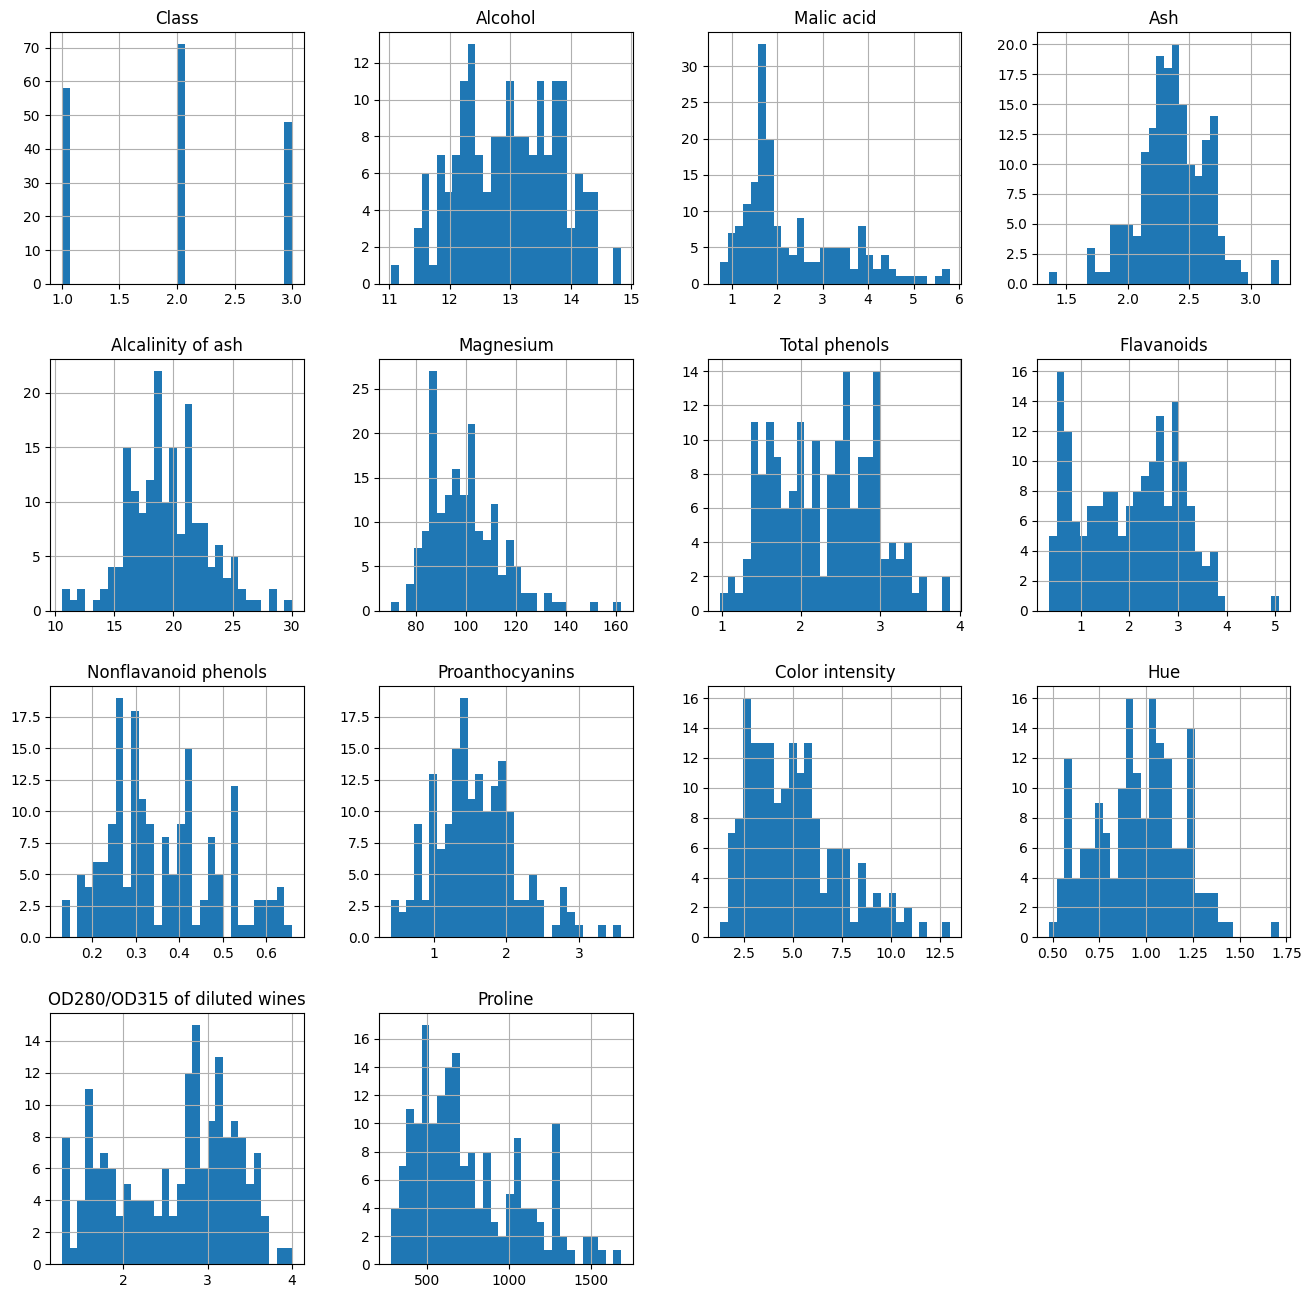

In [8]:
# Visualization / Plot histograms for numerical features:
wine.hist(figsize=(16, 16), bins=30, layout=(4, 4))
plt.show()

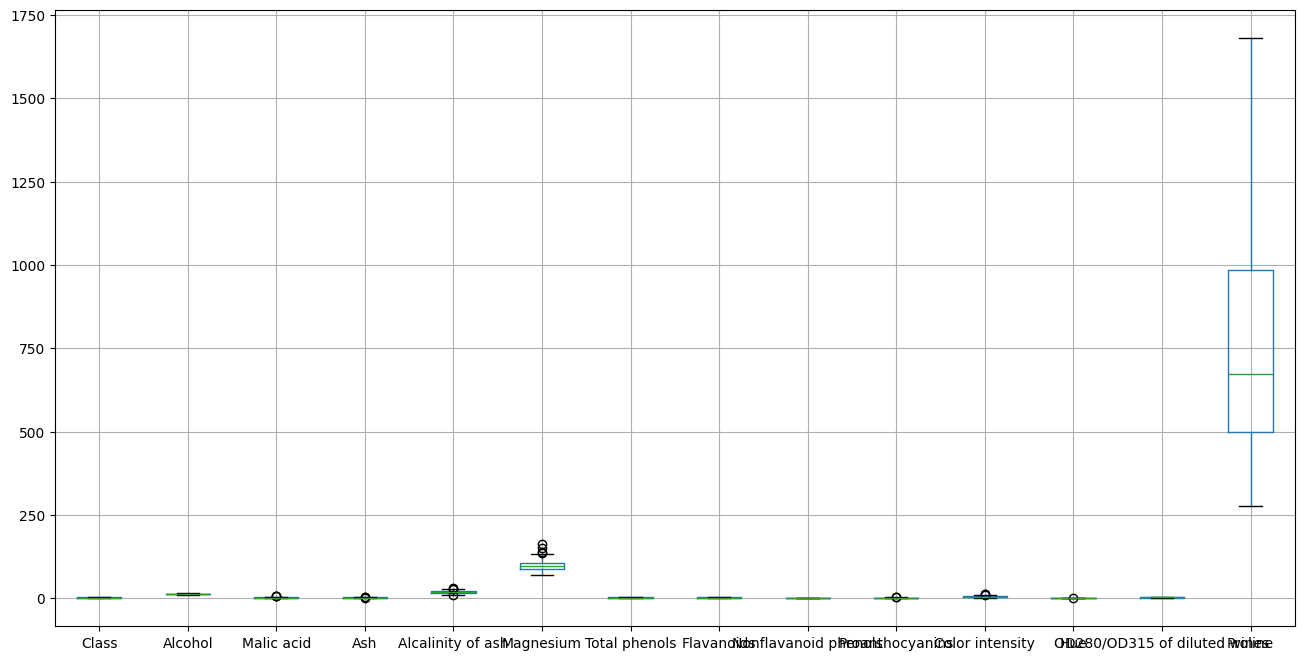

In [13]:
# Plot boxplots for numerical features:
wine.boxplot(figsize=(16, 8))
plt.show()

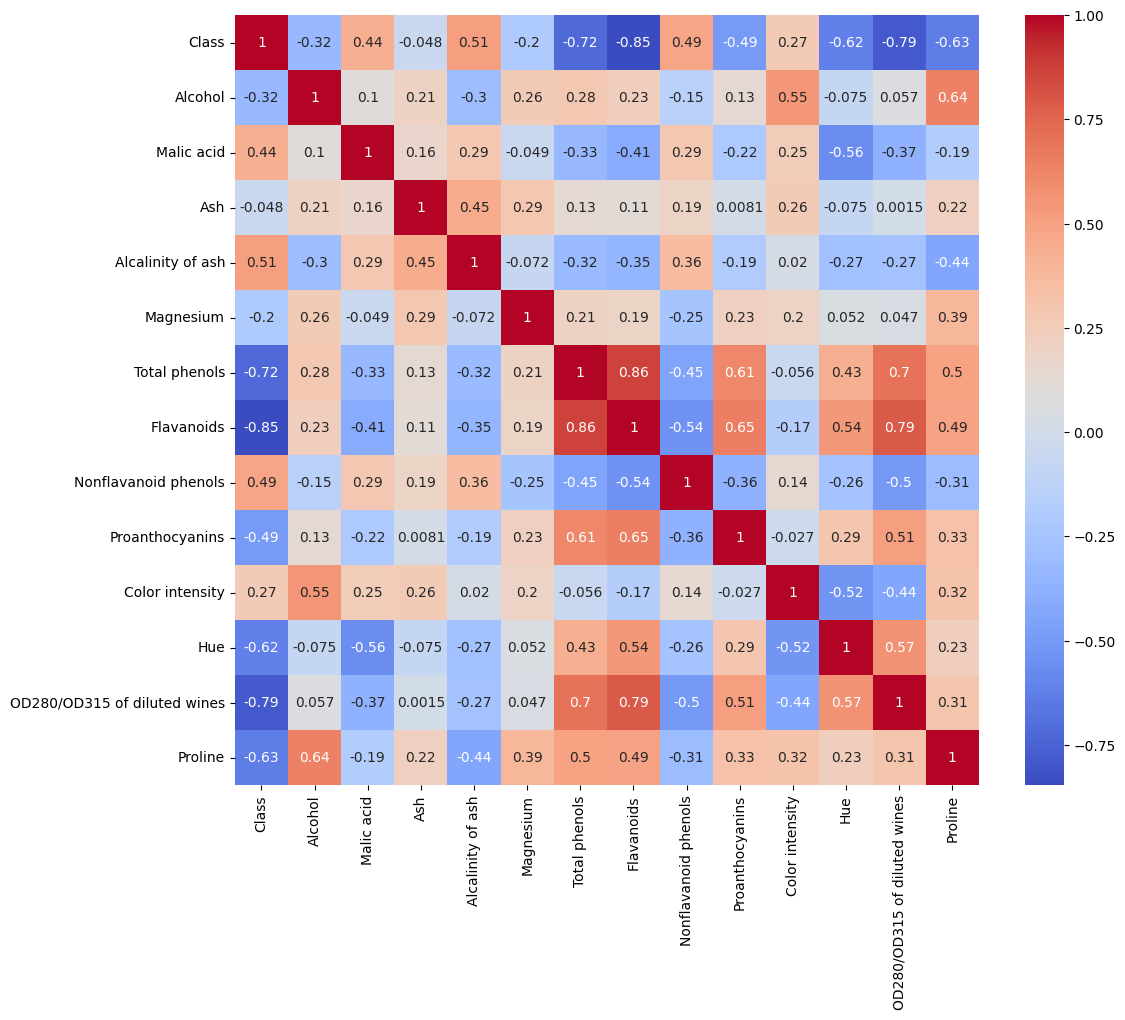

In [15]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Target Variable Analysis
# Analyze the distribution of the target variable (wine class):

print(wine['Class'].value_counts())

Class
2    71
1    58
3    48
Name: count, dtype: int64


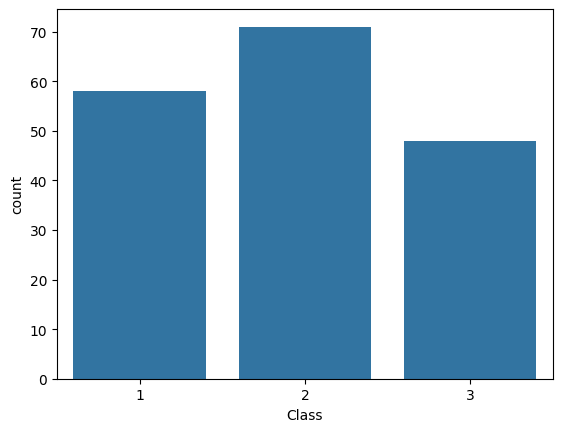

In [19]:
# Visualize the target variable using a countplot

sns.countplot(x='Class', data=wine)
plt.show()

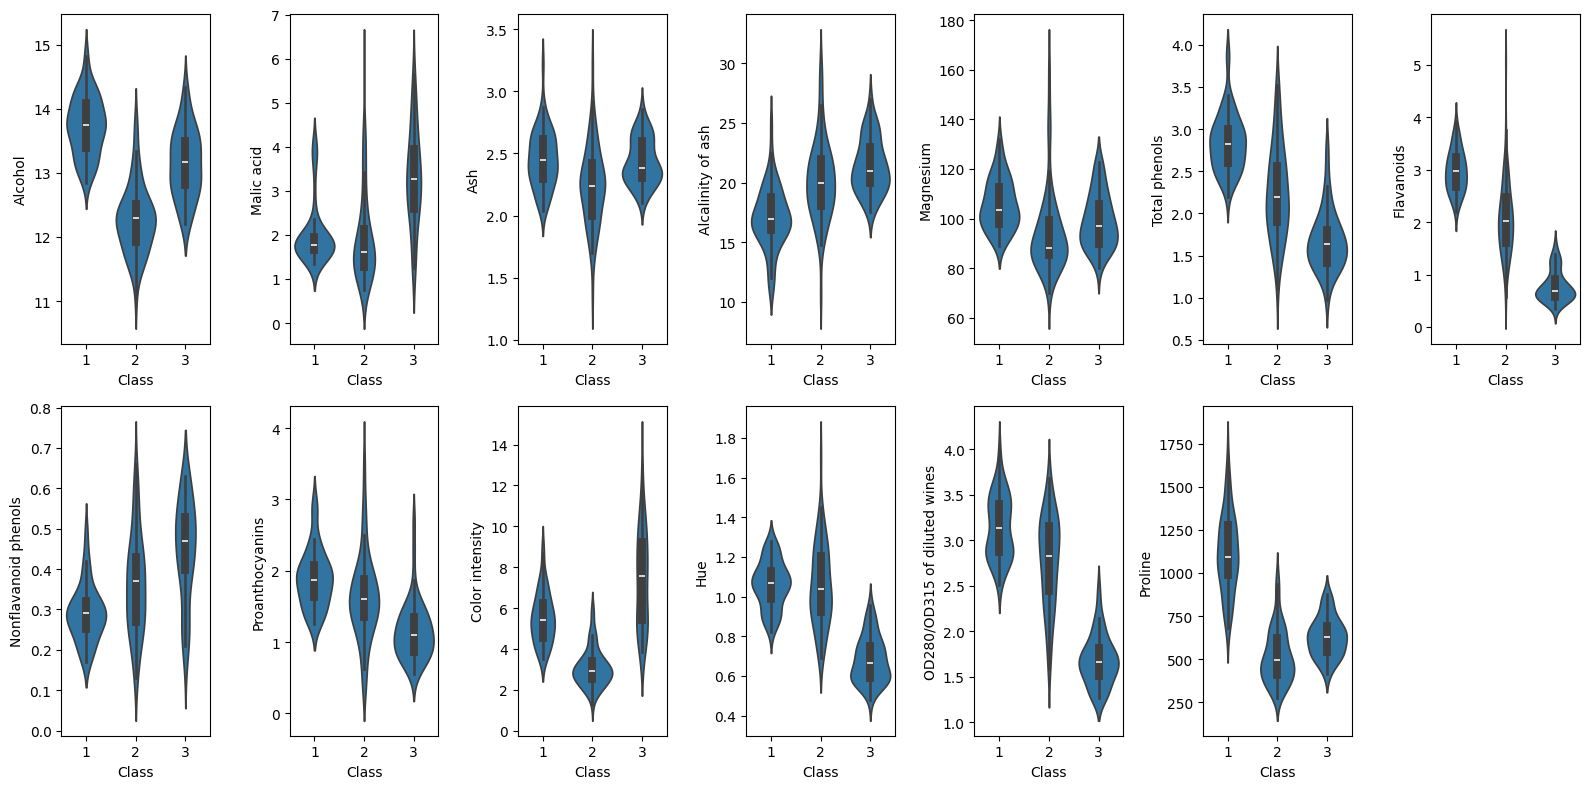

In [21]:
# Feature-Target Relationship
# Plot scatter plots or violin plots to explore the relationship between features and the target variable

plt.figure(figsize=(16, 8))
for i, col in enumerate(wine.columns[1:]):
    plt.subplot(2, 7, i+1)
    sns.violinplot(x='Class', y=col, data=wine)
plt.tight_layout()
plt.show()

In [23]:
# DATA PREPROCESSING

# Split the dataset into training and test sets

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = wine.drop('Class', axis=1)
y = wine['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Feature Scaling:
# Since the features in the Wine dataset have different scales, it's a good practice to scale them before applying 
# machine learning algorithms. We'll use StandardScaler from scikit-learn.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.71      0.83        14
           3       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.89        36


Confusion Matrix:
[[14  0  0]
 [ 0 10  4]
 [ 0  0  8]]
